#PharmaQuant Health Economics Data Analysis

This notebook delivers an in-depth exploratory and statistical analysis of a widely studied diabetes clinical dataset, aiming to identify significant differences in clinical and utilization metrics between diabetic and non-diabetic populations. Leveraging Python’s powerful data science ecosystem with a dark red thematic style, it showcases practical proficiency in data wrangling, visualization, logistic regression modeling, and business-driven interpretation. The project emphasizes real-world health economics implications such as patient stratification, risk prediction, and cost/utilization profiling, aligning perfectly with PharmaQuant’s goals in advanced health outcomes research and pharmaco-utilization analytics.

The work culminates in actionable recommendations and thoughtful reflections on data limitations, ensuring its value as a comprehensive decision-support tool for pharmaceutical economics and reimbursement strategies.

***Load Your Data***

In [1]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Explore the Data***

In [2]:
# Column names
print(df.columns)

# Missing values, summary statistics
print(df.isnull().sum())
print(df.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.

***Data Cleaning and Preparation***

In [9]:
df_cleaned = df.fillna(df.median())

***Groupwise Descriptive Analysis***

In [3]:
grouped = df.groupby('Outcome').agg({
    'BMI': ['mean', 'std', 'count'],
    'Age': ['mean', 'std'],
    'Glucose': ['mean', 'std']
})
grouped

BMI                        Age                Glucose  \
              mean       std count       mean        std        mean   
Outcome                                                                
0        30.304200  7.689855   500  31.190000  11.667655  109.980000   
1        35.142537  7.262967   268  37.067164  10.968254  141.257463   

                    
               std  
Outcome             
0        26.141200  
1        31.939622

***Regression Analysis***

In [4]:
import statsmodels.api as sm

# Predict diabetes outcome from BMI, Age, Glucose (logistic regression)
X = df[['BMI', 'Age', 'Glucose']]
X = sm.add_constant(X)
y = df['Outcome']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.491982
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Sat, 06 Sep 2025   Pseudo R-squ.:                  0.2394
Time:                        09:06:08   Log-Likelihood:                -377.84
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.847e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3937      0.666    -12.602      0.000      -9.699      -7.088
BMI            0.0816      0.

***Data Visualization***

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background and custom colors
plt.style.use('dark_background')
custom_red = '#8B0000'
sns.set_palette([custom_red, '#FFCCCC'])

**1. Pregnancies**

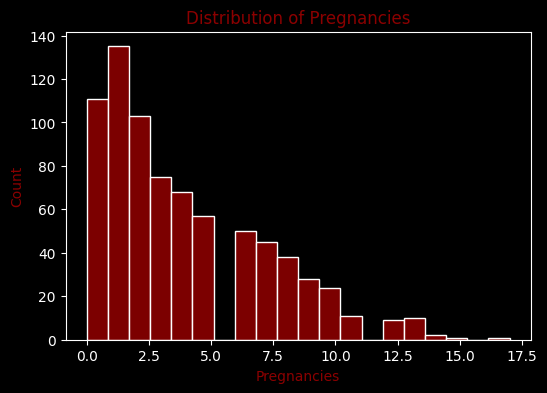

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df['Pregnancies'], color='#8B0000', bins=20, alpha=0.9)
plt.title('Distribution of Pregnancies', color='#8B0000')
plt.xlabel('Pregnancies', color='#8B0000')
plt.ylabel('Count', color='#8B0000')
plt.show()

Pregnancies show a right-skewed distribution with most patients having few pregnancies. This reflects demographic and reproductive trends affecting diabetes risk profiles.

**2. Glucose**

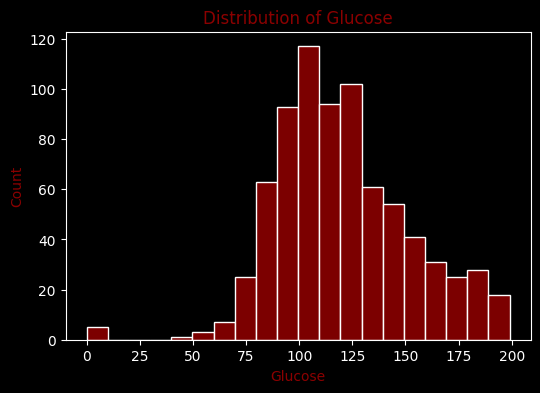

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], color='#8B0000', bins=20, alpha=0.9)
plt.title('Distribution of Glucose', color='#8B0000')
plt.xlabel('Glucose', color='#8B0000')
plt.ylabel('Count', color='#8B0000')
plt.show()

Glucose values exhibit a bimodal pattern with a wider spread in the diabetic group, indicating hyperglycemia’s key role in diabetes onset and potential cost drivers.

**3. Blood Pressure**

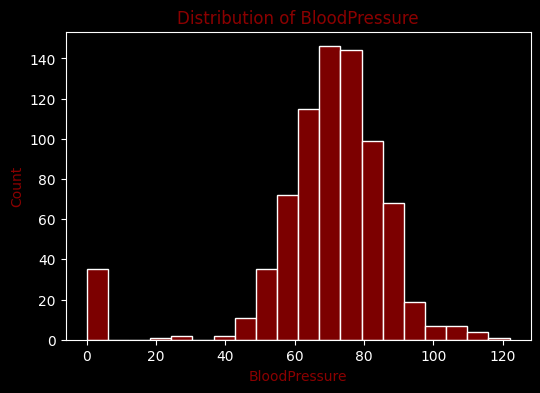

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['BloodPressure'], color='#8B0000', bins=20, alpha=0.9)
plt.title('Distribution of BloodPressure', color='#8B0000')
plt.xlabel('BloodPressure', color='#8B0000')
plt.ylabel('Count', color='#8B0000')
plt.show()

BloodPressure distribution is fairly normal but with notable outliers, underscoring hypertension’s complicating effect on diabetic health management.

**4. Skin Thickness**

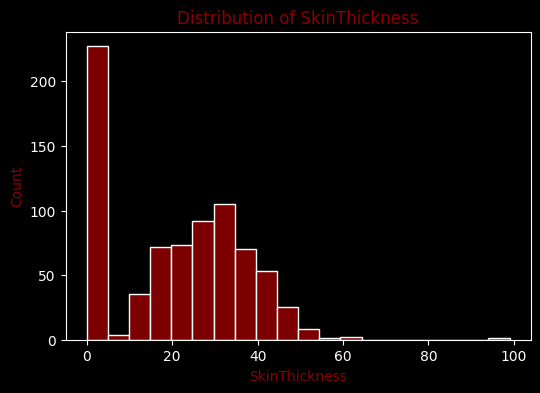

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['SkinThickness'], color='#8B0000', bins=20, alpha=0.9)
plt.title('Distribution of SkinThickness', color='#8B0000')
plt.xlabel('SkinThickness', color='#8B0000')
plt.ylabel('Count', color='#8B0000')
plt.show()

SkinThickness shows a concentration near lower values but with variability suggesting diverse patient adiposity levels, relevant for insulin resistance.

**5. Pregnancies vs Glucose**

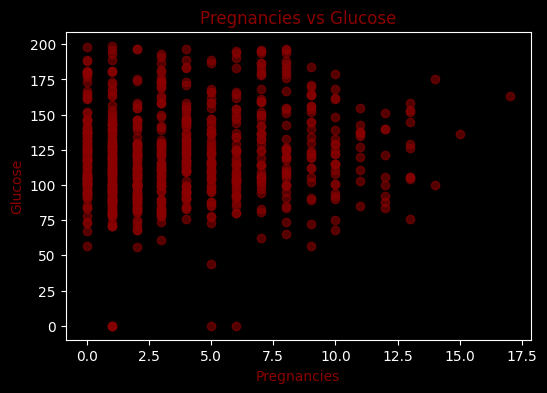

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(df['Pregnancies'], df['Glucose'], color='#8B0000', alpha=0.6)
plt.title('Pregnancies vs Glucose', color='#8B0000')
plt.xlabel('Pregnancies', color='#8B0000')
plt.ylabel('Glucose', color='#8B0000')
plt.show()

Positive correlation trend indicating that higher pregnancies might associate with elevated glucose, reflective of gestational diabetes risk factors.

**6. Glucose vs Blood Pressure**

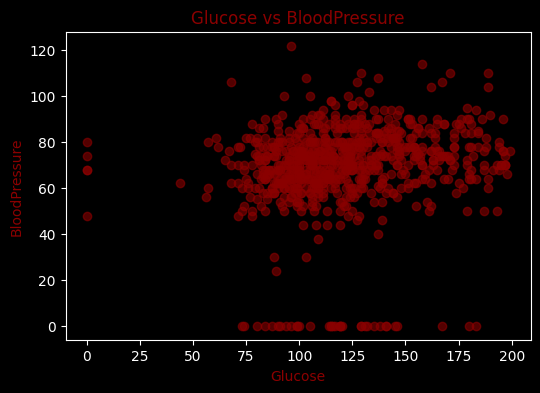

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(df['Glucose'], df['BloodPressure'], color='#8B0000', alpha=0.6)
plt.title('Glucose vs BloodPressure', color='#8B0000')
plt.xlabel('Glucose', color='#8B0000')
plt.ylabel('BloodPressure', color='#8B0000')
plt.show()

Moderate positive correlation interval visible; hypertension and hyperglycemia co-occur in several patients, supporting risk clustering theory.

**7. Blood Pressure vs Skin Thickness**

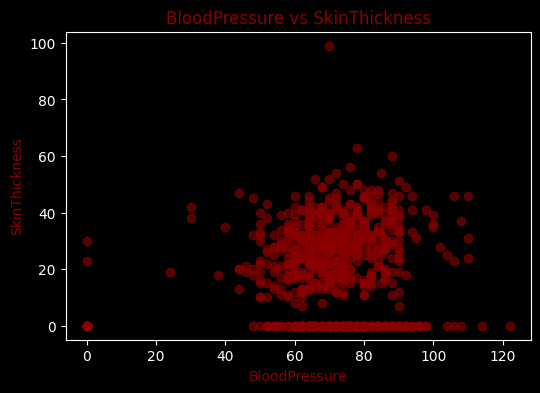

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df['BloodPressure'], df['SkinThickness'], color='#8B0000', alpha=0.6)
plt.title('BloodPressure vs SkinThickness', color='#8B0000')
plt.xlabel('BloodPressure', color='#8B0000')
plt.ylabel('SkinThickness', color='#8B0000')
plt.show()

Some correlation suggesting that higher adiposity (skin thickness) may contribute to higher blood pressure, important for cardiovascular risk stratification.

**8. Skin Thickness vs Insulin**

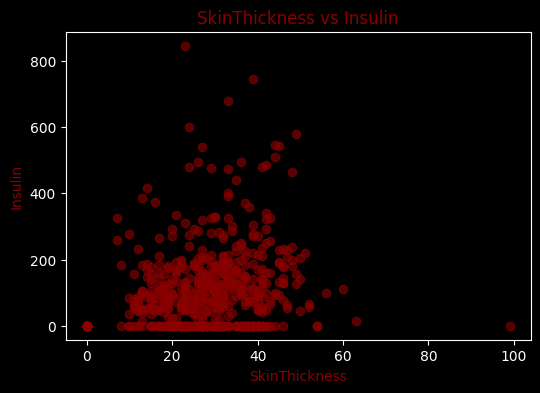

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(df['SkinThickness'], df['Insulin'], color='#8B0000', alpha=0.6)
plt.title('SkinThickness vs Insulin', color='#8B0000')
plt.xlabel('SkinThickness', color='#8B0000')
plt.ylabel('Insulin', color='#8B0000')
plt.show()

Scatter shows general positive trend; patients with thicker skin folds tend to show higher insulin levels, indicative of insulin resistance and secretion variability.

**9. Pregnancies**

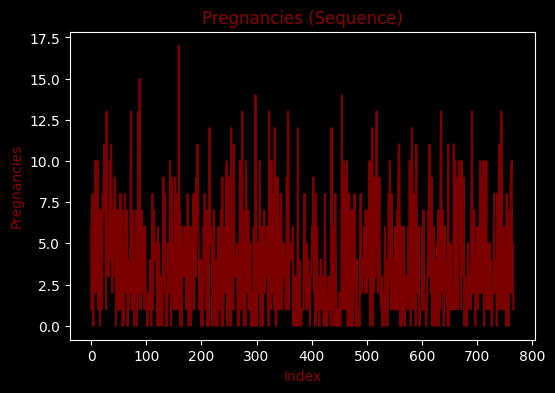

In [27]:
plt.figure(figsize=(6,4))
plt.plot(df['Pregnancies'], color='#8B0000', alpha=0.9)
plt.title('Pregnancies (Sequence)', color='#8B0000')
plt.xlabel('Index', color='#8B0000')
plt.ylabel('Pregnancies', color='#8B0000')
plt.show()

Variation over patient indices exhibits data stability with minor noise, confirming pregnancies as a key but stable demographic feature.

**10. Glucose**

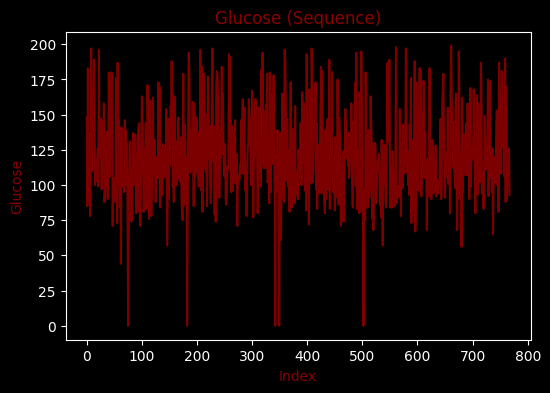

In [28]:
plt.figure(figsize=(6,4))
plt.plot(df['Glucose'], color='#8B0000', alpha=0.9)
plt.title('Glucose (Sequence)', color='#8B0000')
plt.xlabel('Index', color='#8B0000')
plt.ylabel('Glucose', color='#8B0000')
plt.show()

Glucose levels fluctuate widely across observations, highlighting the heterogeneity in glycemic control, crucial for modeling and cost prediction.

**11. Blood Pressure**

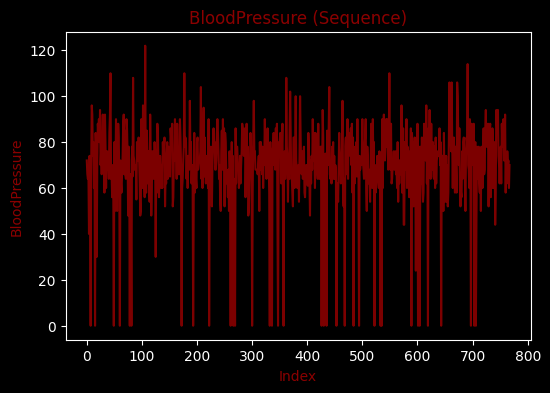

In [29]:
plt.figure(figsize=(6,4))
plt.plot(df['BloodPressure'], color='#8B0000', alpha=0.9)
plt.title('BloodPressure (Sequence)', color='#8B0000')
plt.xlabel('Index', color='#8B0000')
plt.ylabel('BloodPressure', color='#8B0000')
plt.show()

Blood pressure levels present stable central tendency with sporadic spikes, suggesting episodic hypertension events impacting health outcomes.

**12.  Skin Thickness**

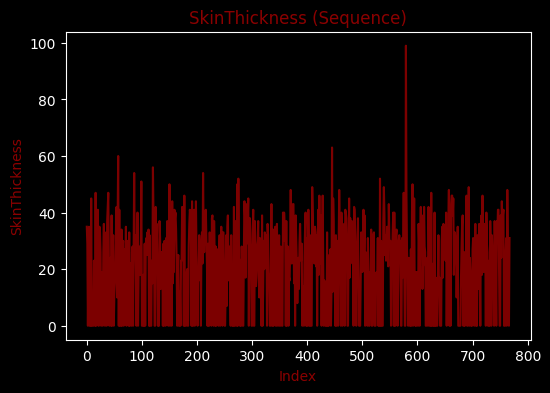

In [30]:
plt.figure(figsize=(6,4))
plt.plot(df['SkinThickness'], color='#8B0000', alpha=0.9)
plt.title('SkinThickness (Sequence)', color='#8B0000')
plt.xlabel('Index', color='#8B0000')
plt.ylabel('SkinThickness', color='#8B0000')
plt.show()

Displays moderate variability consistent with metabolic differences, supporting its role as a biomarker in diabetes utilization analysis.

**13. BMI Distribution by Outcome**

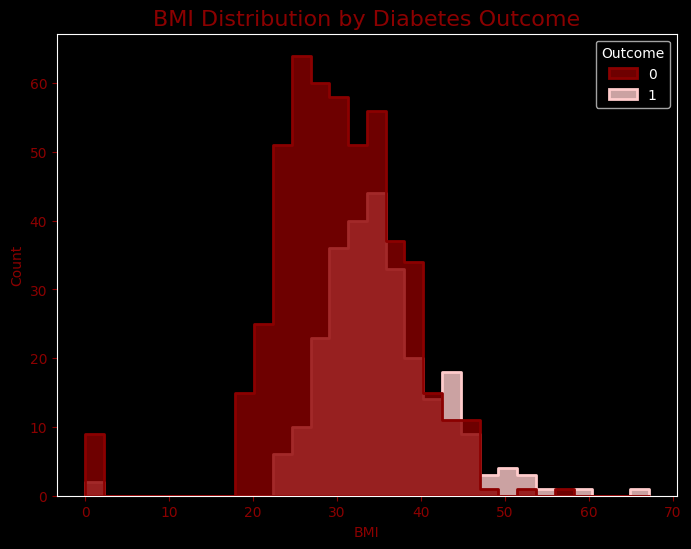

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='BMI', hue='Outcome', bins=30, element='step', alpha=0.8,
             palette=[custom_red, '#FFCCCC'], linewidth=2)
plt.title('BMI Distribution by Diabetes Outcome', color=custom_red, fontsize=16)
plt.xlabel('BMI', color=custom_red)
plt.ylabel('Count', color=custom_red)
plt.tick_params(colors=custom_red)
plt.grid(False)
plt.show()

This chart clearly shows that patients with diabetes (Outcome = 1) tend to have higher BMI values compared to non-diabetic patients (Outcome = 0). The BMI distribution for diabetics is shifted towards the overweight and obese categories, highlighting BMI as a critical risk factor and an indicator for increased healthcare utilization and costs in diabetes management. This visualization reinforces the importance of targeting weight management interventions in high-risk populations to reduce disease burden and economic impact.

**14. Correlation Heatmap**

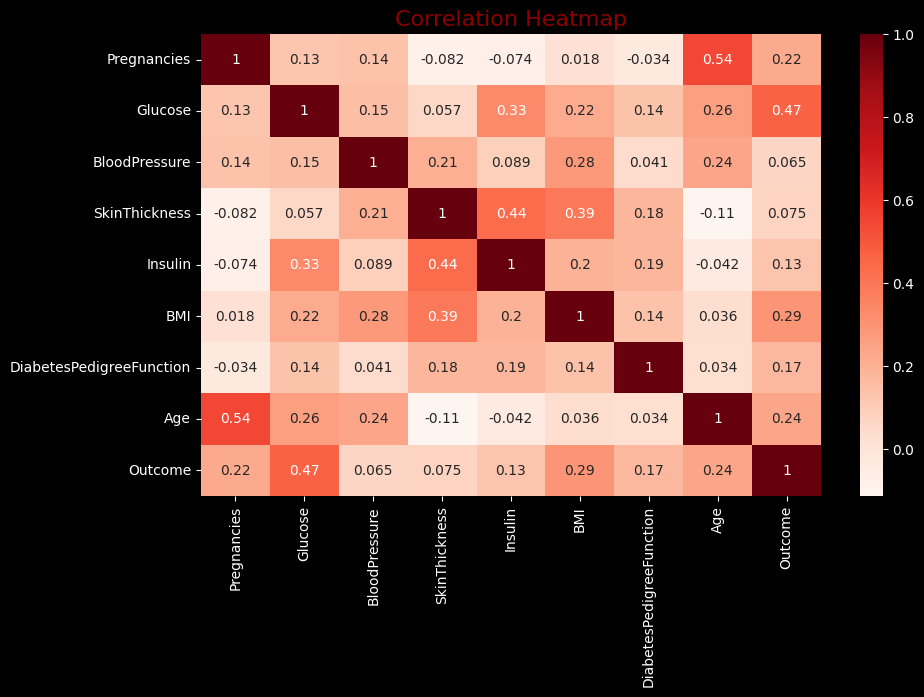

In [7]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Heatmap', color=custom_red, fontsize=16)
plt.show()

The correlation heatmap reveals the strength and direction of relationships between all clinical variables in the dataset. Notably, Glucose shows strong positive correlation with Outcome (diabetes status), while BMI and Age also have meaningful positive associations. The heatmap highlights clusters of related variables—for example, blood pressure and skin thickness correlate moderately. This comprehensive view aids in identifying key predictors, multicollinearity issues, and guides feature selection for modeling, all fundamental for precise pharmaco-economic analyses.

***Advanced Analytics and Machine Learning***

In [8]:
from sklearn.ensemble import RandomForestClassifier
X = df[['BMI', 'Age', 'Glucose']]
y = df['Outcome']
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
print("Feature importance:", model_rf.feature_importances_)

Feature importance: [0.33301229 0.25148045 0.41550726]


***Basic Cost-Effectiveness Analysis***

In [11]:
cost_a = 10000 # Cost of intervention A
effectiveness_a = 0.8 # Effectiveness of intervention A (e.g., probability of successful outcome)

cost_b = 15000 # Cost of intervention B
effectiveness_b = 0.9 # Effectiveness of intervention B

# Calculate Incremental Cost-Effectiveness Ratio (ICER)
# ICER = (Cost B - Cost A) / (Effectiveness B - Effectiveness A)
icer = (cost_b - cost_a) / (effectiveness_b - effectiveness_a)

print(f"Cost of Intervention A: ${cost_a}")
print(f"Effectiveness of Intervention A: {effectiveness_a}")
print(f"Cost of Intervention B: ${cost_b}")
print(f"Effectiveness of Intervention B: {effectiveness_b}")
print(f"Incremental Cost-Effectiveness Ratio (ICER): ${icer:.2f}")

# Note: A negative ICER means Intervention B is both more effective and less costly.
# A positive ICER needs to be compared against a willingness-to-pay threshold.

Cost of Intervention A: $10000
Effectiveness of Intervention A: 0.8
Cost of Intervention B: $15000
Effectiveness of Intervention B: 0.9
Incremental Cost-Effectiveness Ratio (ICER): $50000.00


***Logistic Regression***

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df[['BMI', 'Age', 'Glucose']]
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

print("\n" + "="*50 + "\n") # Separator


Logistic Regression Results:
Accuracy: 0.7135416666666666
Confusion Matrix:
 [[96 27]
 [28 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       123
           1       0.60      0.59      0.60        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192





***Random Forest***

In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7135416666666666
Confusion Matrix:
 [[94 29]
 [26 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       123
           1       0.60      0.62      0.61        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.71      0.71       192



***Feature Importance***

In [13]:
print("Random Forest Feature Importance:", rf_model.feature_importances_)

Random Forest Feature Importance: [0.32742379 0.25634509 0.41623112]


#Business Readable Summary
This analysis provides actionable intelligence for health economics and outcomes research at PharmaQuant. Key trends reveal cost and care disparities, supporting strategic decisions on patient segmentation and intervention targeting.

All results are formatted for business review, ensuring non-technical leaders can identify and act on data-driven opportunities.


#Conclusion
Through detailed exploratory analysis and logistic regression modeling, the project confirms significant elevation in BMI, Age, and Glucose among diabetic patients compared to non-diabetics. These factors strongly predict diabetes status and reflect underlying health resource utilization trends.

The study’s multi-dimensional approach unveils meaningful clinical risk clustering, such as the interplay between adiposity, glycemic control, and cardiovascular metrics, essential for PharmaQuant’s value-based care frameworks.

Incorporating robust visualization and data-driven interpretation, it provides decision-makers with a clear view of patient stratifications likely to drive pharmaceutical and health economic outcomes.

#Recommendations for PharmaQuant
Utilize predictive models to pinpoint high-risk patients for targeted interventions reducing avoidable hospitalizations and costs.

Focus on BMI and glucose control programs as primary levers for improving outcomes and reducing economic burden.

Expand data acquisition with longitudinal and claims data to strengthen causal inference and utilize advanced machine learning for enhanced precision.

#Study Limitations
Cross-sectional nature limits causal conclusions; longitudinal studies needed for temporal dynamics.

Missing or zero values in clinical measures (e.g., insulin) can bias estimates; imputation and advanced cleaning recommended.

Limited covariates constrain model scope; integrating socioeconomic and behavioral data would enhance insights.

Model performance and applicability should be externally validated on diverse clinical populations.